# Praca domowa nr 8

- Dane to tej pracy domowej to lista top 5000 albumów muzycznych wg portalu [rateyourmusic.com](https://rateyourmusic.com). Dataset wraz z opisem można znaleźć na [Kaggle'u](https://www.kaggle.com/datasets/michaelbryantds/top-5000-albums-of-all-time-rateyourmusiccom). 
- Dane znajdują się też w katalogu z pracą domową - nazwa pliku to `rym_top5000.csv`.  

## Zadanie 1 - `numpy` + `pandas` (2 pkt)
Używając funkcji z pakietów `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o albumach muzycznych.

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("rym_top5000.csv")

In [4]:
df.head()

,Ranking,Album,Artist Name,Release Date,Genres,Descriptors,Average Rating,Number of Ratings,Number of Reviews
0,1.0,OK Computer,Radiohead,16 June 1997,"Alternative Rock, Art Rock","melancholic, anxious, futuristic, alienation, ...",4.23,"70,382",1531
1,2.0,Wish You Were Here,Pink Floyd,12 September 1975,"Progressive Rock, Art Rock","melancholic, atmospheric, progressive, male vo...",4.29,"48,662",983
2,3.0,In the Court of the Crimson King,King Crimson,10 October 1969,"Progressive Rock, Art Rock","fantasy, epic, progressive, philosophical, com...",4.30,"44,943",870
3,4.0,Kid A,Radiohead,3 October 2000,"Art Rock, Experimental Rock, Electronic","cold, melancholic, futuristic, atmospheric, an...",4.21,"58,590",734
4,5.0,To Pimp a Butterfly,Kendrick Lamar,15 March 2015,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap","political, conscious, poetic, protest, concept...",4.27,"44,206",379


#### Jacy artyści z ponad 5 albumami na liście mają największą medianę ocen dla swoich albumów? Podaj top 10.

In [6]:
df[df.groupby("Artist Name")['Artist Name'].transform('size') > 5].groupby("Artist Name")['Average Rating'].agg("median").sort_values(ascending=False).head(10)

Artist Name
David Bowie           4.050
The Beatles           4.045
King Crimson          3.970
The Rolling Stones    3.965
Black Sabbath         3.950
Led Zeppelin          3.940
Pink Floyd            3.910
Death                 3.905
John Coltrane         3.905
Bob Dylan             3.890
Name: Average Rating, dtype: float64

#### Jacy artyści mają największą różnicę między najgorszym i najlepszym średnim ratingiem dla swojego albumu? Podaj top 10  oraz najwyższą i najniższą ocenę dla każdego z tych artystów. 

In [67]:
df1 = df.groupby("Artist Name")['Average Rating'].agg(min = "min")
df2 = df.groupby("Artist Name")['Average Rating'].agg(max = "max")
df3 = df1.merge(df2, on="Artist Name")
df3['diff'] = df3['max'] - df3['min']
df3.sort_values(by=['diff'], ascending=False).head(10)

,min,max,diff
Artist Name,,,
Kendrick Lamar,3.52,4.27,0.75
The Beatles,3.55,4.25,0.70
Pink Floyd,3.60,4.29,0.69
My Bloody Valentine,3.58,4.24,0.66
King Crimson,3.67,4.30,0.63
John Coltrane,3.70,4.30,0.60
Radiohead,3.66,4.23,0.57
Miles Davis,3.69,4.23,0.54
The Cure,3.63,4.17,0.54


#### Podaj top 10 albumów o największym stosunku liczby ocen do liczby recenzji. Wedfź pod uwagę tylko albumy o przynajmniej 5000 ocenach i 15 recenzjach.

In [106]:
df['Number of Ratings']=df['Number of Ratings'].str.replace(',','')
#df = df[pd.to_numeric(df['Number of Ratings'], errors='coerce').notnull()]
df = df.astype({'Number of Ratings':'int'})
df4 = df[(df['Number of Ratings'] > 4999) & (df['Number of Reviews'] > 14)].assign(ratio = lambda x:x['Number of Ratings']/x['Number of Reviews'])
df4.sort_values(by=['ratio'], ascending=False).head(10)

,Ranking,Album,Artist Name,Release Date,Genres,Descriptors,Average Rating,Number of Ratings,Number of Reviews,ratio
353,354.0,Jenny Death: The Powers That B Disc 2,Death Grips,19 March 2015,"Experimental Hip Hop, Noise Rock, Industrial H...","noisy, abstract, aggressive, male vocals, mani...",3.90,10855,30,361.833333
1695,1696.0,Bury Me at Makeout Creek,Mitski,11 November 2014,"Indie Rock, Singer/Songwriter","lonely, anxious, passionate, suicide, raw, fem...",3.77,5856,19,308.210526
3733,3734.0,春と修羅 (Haru to Shura),春ねむり [Haru Nemuri],11 April 2018,"Noise Pop, J-Rock, J-Pop","female vocals, energetic, passionate, rhythmic...",3.67,6277,23,272.913043
4949,4950.0,Saturation,Brockhampton,9 June 2017,"Pop Rap, West Coast Hip Hop","eclectic, boastful, male vocals, LGBT, vulgar,...",3.55,17629,70,251.842857
1036,1037.0,Saturation III,Brockhampton,15 December 2017,"Pop Rap, West Coast Hip Hop","quirky, male vocals, introspective, LGBT, boas...",3.74,17118,68,251.735294
2489,2490.0,Scenery,福居良 [Ryo Fukui],1976,Hard Bop,"instrumental, playful, warm, summer, happy, me...",3.73,5968,24,248.666667
643,644.0,Endless,Frank Ocean,9 April 2018,"Ambient Pop, Alternative R&B, Art Pop","atmospheric, ethereal, mellow, male vocals, me...",3.85,8911,39,228.487179
2869,2870.0,Imperial,Denzel Curry,9 March 2016,"Southern Hip Hop, Trap","angry, political, aggressive, crime, urban, dr...",3.66,11271,50,225.420000
950,951.0,Saturation II,Brockhampton,25 August 2017,"Pop Rap, West Coast Hip Hop","LGBT, boastful, summer, male vocals, playful, ...",3.74,18322,85,215.552941
439,440.0,Bottomless Pit,Death Grips,6 May 2016,"Industrial Hip Hop, Abstract Hip Hop, Experime...","aggressive, chaotic, noisy, manic, energetic, ...",3.82,20614,102,202.098039


#### Z których lat pochodzi najwięcej albumów na liście najpopularniejszych wśród krytyków i najpopularniejszych wśród oceniających? 
a) Podaj 5 lat, w których wydano najwięcej albumów z listy mających liczbę recenzji większą niż Q3 (trzeci kwartyl).

b) Podaj 5 lat, w których wydano najwięcej albumów z listy mających liczbę ocen większą niż Q3 (trzeci kwartyl).


In [156]:
dfYear = df
rat3rdQ = df['Number of Ratings'].quantile(q=0.75)
rev3rdQ = df['Number of Reviews'].quantile(q=0.75)
dfYear['Year'] = pd.to_datetime(dfYear['Release Date'])
dfYear['Year'] = pd.DatetimeIndex(df['Year']).year
dfRat = dfYear[dfYear['Number of Ratings'] > rat3rdQ].groupby('Year', as_index=False)['Year'].agg({'n' : "count"})
dfRev = dfYear[dfYear['Number of Reviews'] > rev3rdQ].groupby('Year')['Year'].agg(n = 'count')
dfRev.sort_values(by=['n'], ascending=False).head(5) #a) 1970 1971 1969 1994 1995
dfRat.sort_values(by=['n'], ascending=False).head(5) #b) 1994 1971 1970 1996 1995

,Year,n
37,1994,41
14,1971,36
13,1970,35
39,1996,34
38,1995,33


## Zadanie 2 - wizualizacja (3 pkt)
- Za pomocą pakietów `matplotlib` i `seaborn` stwórz dwa wykresy. 
- Wykorzystaj funkcję `matplotlib.pyplot.subplots`, by umieścić je we wspólnej figurze. 
- Jeden z wykresów ma opierać się na wynikach z zadania 1 - wizualizować odpowiedź na wybrane pytanie. 
- Drugi wykres może mieć dowolną tematykę, ale ma być powiązany z wcześniejszym, tak by figura mogła mieć wspólny tytuł.

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
dfData = dfYear[dfYear['Number of Ratings'] > rat3rdQ].groupby('Year', as_index=False).agg({'Average Rating' : "mean"})
dfData

,Year,Average Rating
0,1955,3.640000
1,1957,3.890000
2,1958,3.980000
3,1959,4.056000
4,1960,4.000000
...,...,...
60,2017,3.690000
61,2018,3.744783
62,2019,3.735625
63,2020,3.711250


(3.0, 4.5)

<Figure size 640x480 with 0 Axes>

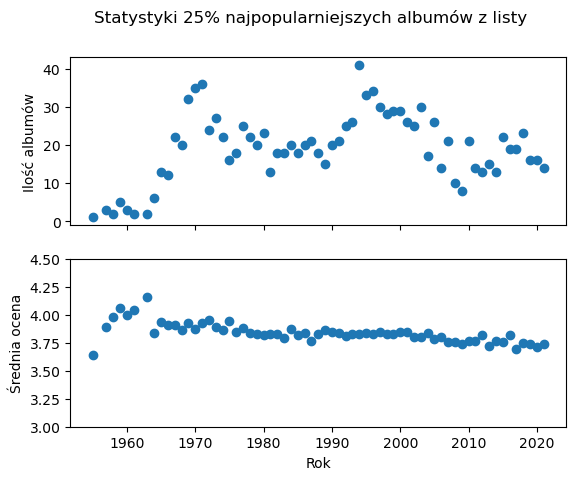

In [166]:
f = plt.figure()    
f, axes = plt.subplots(2, sharex=True, sharey=False)
f.suptitle("Statystyki 25% najpopularniejszych albumów z listy")
axes[0].scatter(x=dfRat['Year'], y=dfRat['n'])
axes[0].set_ylabel("Ilość albumów")
axes[1].scatter(x=dfData["Year"], y=dfData['Average Rating'])
axes[1].set_xlabel("Rok")
axes[1].set_ylabel("Średnia ocena")
axes[1].set_ylim([3, 4.5])


## * Zadanie 3 - bonusowe (1 pkt)

Zapisz wygenerowaną figurę do formatu `.pgf` i załącz w raporcie wygenerowanym w `LaTeX` tak, by na wykresie zawierał się klikalny link do strony `www.rateyourmusic.com` (np. w tytule) - można zrobić to ręcznie, edytując zapisany plik `.pgf`. Przykład w katalogu z pracą domową w pliku `pgf_example.pdf` (klikalny tytuł i elementy legendy).  

Załącz w rozwiązaniu wygenerowany plik `pdf`. 